In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [ ]:
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-0.742541,0.246424
1,1.263587,-0.270019
1,1.098372,-0.539584
0,0.181264,1.019650
0,-0.135282,1.002026


Text(0, 0.5, '$x_2$')

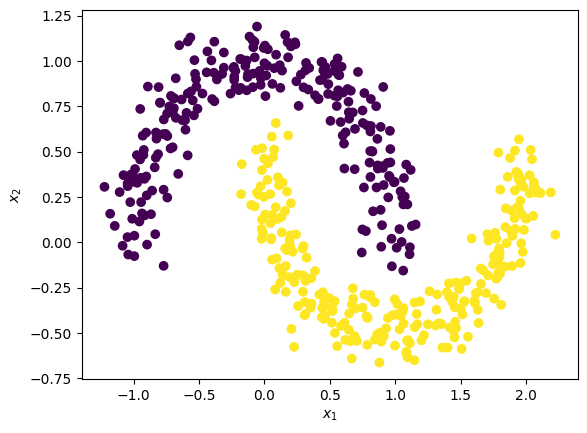

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

DBSCAN()

Text(0, 0.5, '$x_2$')

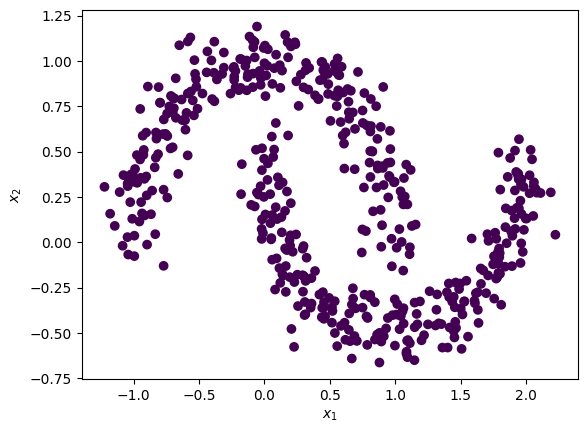

In [ ]:
# Visualizing DBSCAN
plt.scatter(X[:, 0],
            X[:, 1],
            c=dbscan_cluster1.labels_,
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 1


In [ ]:
# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 0


In [ ]:
# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

v_measure = 0.0


In [ ]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.1, min_samples=8)

Text(0, 0.5, '$x_2$')

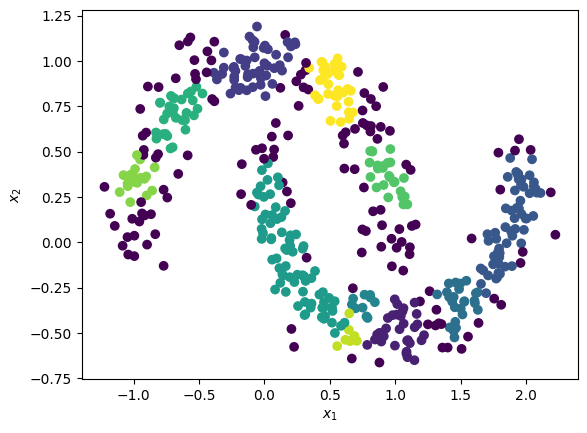

In [ ]:
# Visualizing DBSCAN
plt.scatter(X[:, 0],
X[:, 1],
c=dbscan_cluster.labels_,
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 11


In [ ]:
# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 135


In [ ]:
# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

v_measure = 0.35990775572949585


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

In [ ]:
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

Text(0, 0.5, 'Distance')

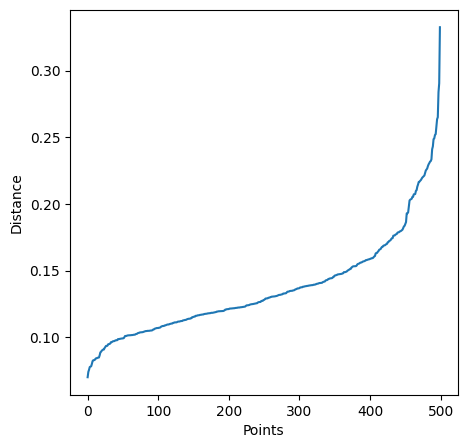

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")